Consider the dataset that was created with the objective of facilitating the studies of convolutional neural networks and computer vision.
Due to the current context related to the coronavirus pandemic, humanity had to adapt to the new reality. The use of face masks has become commonplace in countries around the world.
The dataset has 3829 images separated into two distinct categories:
- With mask
- Without mask

Use this dataset to implement an image classification model, which will classify whether the given image is with the mask or without the mask.
Link to the Dataset: (archive.zip)


### Importing Libraries

In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

### Analysing Files in directories

In [3]:
print("The number of images with facemask labelling 'with_mask':",len(os.listdir('dataset/train/with_mask')))
print("The number of images with facemask labelling 'without_mask':",len(os.listdir('dataset/train/without_mask/')))

The number of images with facemask labelling 'with_mask': 1526
The number of images with facemask labelling 'without_mask': 1538


### Analysing Training and Test sets

In [12]:
print("The number of images with facemask in the training set labelled 'yes':", len(os.listdir('dataset/train/with_mask')))
print("The number of images with facemask in the test set labelled 'yes':", len(os.listdir('dataset/test/with_mask')))
print("The number of images without facemask in the training set labelled 'no':", len(os.listdir('dataset/train/without_mask')))
print("The number of images without facemask in the test set labelled 'no':", len(os.listdir('dataset/test/without_mask')))

The number of images with facemask in the training set labelled 'yes': 1526
The number of images with facemask in the test set labelled 'yes': 380
The number of images without facemask in the training set labelled 'no': 1538
The number of images without facemask in the test set labelled 'no': 380


### Compiling the model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### Configuring the model parameters

In [6]:
TRAINING_DIR = "dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 3064 images belonging to 2 classes.
Found 760 images belonging to 2 classes.


### Building the classification model  

In [41]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/30
264/307 [========================>.....] - ETA: 7s - loss: 0.2753 - acc: 0.8967

C:\Users\Pawan\.conda\envs\Deep Learning\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


307/307 [==============================] - 61s 198ms/step - loss: 0.2971 - acc: 0.8887 - val_loss: 0.2578 - val_acc: 0.9000
Epoch 2/30
307/307 [==============================] - 59s 193ms/step - loss: 0.2719 - acc: 0.8946 - val_loss: 0.2878 - val_acc: 0.8882
Epoch 3/30
307/307 [==============================] - 61s 197ms/step - loss: 0.2654 - acc: 0.8956 - val_loss: 0.2608 - val_acc: 0.8947
Epoch 4/30
307/307 [==============================] - 61s 199ms/step - loss: 0.2718 - acc: 0.8949 - val_loss: 0.2487 - val_acc: 0.9053
Epoch 5/30
307/307 [==============================] - 60s 195ms/step - loss: 0.2415 - acc: 0.9093 - val_loss: 0.2749 - val_acc: 0.8974
Epoch 6/30
307/307 [==============================] - 61s 198ms/step - loss: 0.2376 - acc: 0.9060 - val_loss: 0.2448 - val_acc: 0.9066
Epoch 7/30
307/307 [==============================] - 60s 194ms/step - loss: 0.2348 - acc: 0.9093 - val_loss: 0.6308 - val_acc: 0.8355
Epoch 8/30
307/307 [==============================] - 61s 198ms/st

In [42]:
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [43]:
model.save_weights("model.h5")

###  Plot the training loss and accuracy

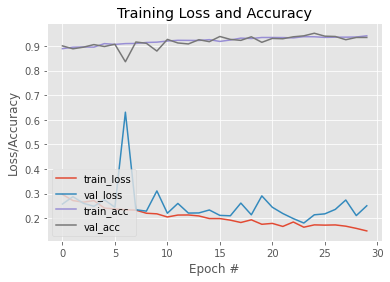

In [45]:
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Running the model on Test data

In [52]:
labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

test_directory = 'tests'
for root, directories, file in os.walk(test_directory):
    files = file
    
for file in files:
    im = cv2.imread(os.path.join(test_directory , file))
    
    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        cv2.imwrite(os.path.join(os.getcwd()+'output')+str('output_'+file+'.jpg'), im)
 

### Importing the saved output files to view output images 

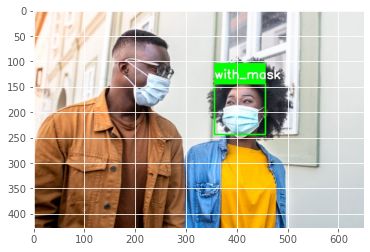

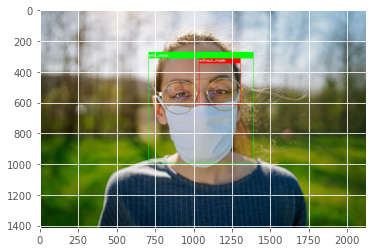

In [54]:
import glob
imdir = "output"
ext = ['jpg']    

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

for image in images:
  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
